In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder

import statsmodels.graphics.tsaplots as sgt
import scipy.stats as stats

from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_validate

le = LabelEncoder()
# from catboost import CatBoostClassifier, Pool
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from functools import partial
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
# from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
# fmin - основная функция, она будет минимизировать наш функционал
# tpe - алгоритм оптимизации
# hp - включает набор методов для объявления пространства поиска гиперпараметров
# trails - используется для логирования результатов

%matplotlib inline
sns.set_context("talk")

# random state
RS = 1
# %matplotlib widget

In [2]:
#В колабе импортируем все необходимые библиотеки
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Привязываем гуглдиск к колабу
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
folder_id = '10p0lq5F8sqA5wk0sOGO-PggX9XzPgEe0'  # Замените на ID вашей папки
# https://drive.google.com/drive/folders/10p0lq5F8sqA5wk0sOGO-PggX9XzPgEe0?usp=drive_link

file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()
filename_list = []
for file in file_list:
  filename_list.append(file['title'])

In [4]:
filename_list

['meta_information',
 '2023-05-31_15-46-37.palm',
 '2023-05-31_15-46-37.palm.protocol.csv',
 'meta_information.csv',
 '2023-05-31_17-14-41.palm.protocol.csv',
 '2023-05-31_17-14-41.palm',
 '2023-10-23_14-07-13.palm.protocol.csv',
 '2023-10-25_08-52-30.palm',
 '2023-09-29_09-20-47.palm.protocol.csv',
 '2023-09-13_22-14-05.palm.protocol.csv',
 '2023-09-29_11-03-50.palm.protocol.csv',
 '2023-10-23_14-07-13.palm',
 '2023-09-29_11-03-50.palm',
 '2023-09-30_08-06-44.palm',
 '2023-10-25_11-08-46.palm.protocol.csv',
 '2023-10-18_11-16-21.palm',
 '2023-10-25_11-08-46.palm',
 '2023-10-23_10-11-45.palm.protocol.csv',
 '2023-10-18_11-16-21.palm.protocol.csv',
 '2023-09-30_08-06-44.palm.protocol.csv',
 '2023-10-18_08-05-29.palm.protocol.csv',
 '2023-09-12_12-55-22.palm.protocol.csv',
 '2023-10-25_08-52-30.palm.protocol.csv',
 '2023-09-29_09-20-47.palm',
 '2023-06-20_14-43-11.palm',
 '2023-10-23_10-11-45.palm',
 '2023-10-18_08-05-29.palm',
 '2023-09-12_14-59-23.palm.protocol.csv',
 '2023-06-20_13-30

ТЗ: При разработке модели необходимо проверить, возможно ли обучить ее на данных предыдущих пилотов для последующего их использования новыми пилотами;

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit

import statsmodels.graphics.tsaplots as sgt
import scipy.stats as stats

from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_validate

# from catboost import CatBoostClassifier, Pool
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from functools import partial
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
# from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
# fmin - основная функция, она будет минимизировать наш функционал
# tpe - алгоритм оптимизации
# hp - включает набор методов для объявления пространства поиска гиперпараметров
# trails - используется для логирования результатов

%matplotlib inline
sns.set_context("talk")

# random state
RS = 1
# %matplotlib widget

Нам неизвестны количество пилотов и характеристики их двиижений.
Идея состоит в том, чтобы кластеризовать данные разных пилотов.
Если модель сможет выделить их характеристики в кластеры, то гипотезу об индивидуальности их стиля можно будет считать доказанной и мы сможем предсказывать их кластер по данным модели и экономить время на обучение модели.

In [6]:
from google.colab import drive
# Это потребует авторизации.

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!ls

data  drive  sample_data


In [8]:
!mkdir ./data

mkdir: cannot create directory ‘./data’: File exists


In [9]:
!cp -r "/content/drive/MyDrive/_Проекты /Моторика/Стажировка/motorica-x-skillfactory-gestures/data" "/content"

cp: cannot open '/content/drive/MyDrive/_Проекты /Моторика/Стажировка/motorica-x-skillfactory-gestures/data/meta_information.gsheet' for reading: Operation not supported


In [10]:
df_meta = pd.read_csv('/content/data/meta_information.csv', index_col=0)

# IO utils


In [11]:
def read_omg_csv(path_palm_data: str,
                 n_omg_channels: int,
                 n_acc_channels: int = 0,
                 n_gyr_channels: int = 0,
                 n_mag_channels: int = 0,
                 n_enc_channels: int = 0,
                 button_ch: bool = True,
                 sync_ch: bool = True,
                 timestamp_ch: bool = True) -> pd.DataFrame:

    '''
    Reads CSV data for OMG data
    NB: data must be separated by " " separator

        Parameters:
                path_palm_data  (str): path to csv data file
                n_omg_channels  (int): Number of OMG channels
                n_acc_channels  (int): Number of Accelerometer channels, default = 0
                n_gyr_channels  (int): Number of Gyroscope channels, default = 0
                n_mag_channels  (int): Number of Magnetometer channels, default = 0
                n_enc_channels  (int): Number of Encoder channels, default = 0
                button_ch      (bool): If button channel is present, default = True
                sync_ch        (bool): If synchronization channel is present, default = True
                timestamp_ch   (bool): If timestamp channel is present, default = True

        Returns:
                df_raw (pd.DataFrame): Parsed pandas Dataframe with OMG data
    '''

    df_raw = pd.read_csv(path_palm_data, sep=' ',
                         header=None,
                         skipfooter=1,
                         skiprows=1,
                         engine='python')
    columns = np.arange(n_omg_channels).astype('str').tolist()

    for label, label_count in zip(['ACC', 'GYR', 'MAG', 'ENC'],
                                  [n_acc_channels, n_gyr_channels, n_mag_channels, n_enc_channels]):
        columns = columns + ['{}{}'.format(label, i) for i in range(label_count)]

    if button_ch:
        columns = columns + ['BUTTON']

    if sync_ch:
        columns = columns + ['SYNC']

    if timestamp_ch:
        columns = columns + ['ts']

    df_raw.columns = columns

    return df_raw

In [12]:
filename_list[2][-12:-4]

'protocol'

In [13]:
def add_feature_derivative(df):
  """Функция для добавления признака производной

    Args:
        df (DataFrame): датасет

    Returns:
        df_log(DataFrame): датасет с добавленным признаком производной
  """
  col_list_base = list(df.columns) #исходный список признаков
  df_temp = df.copy()
  for i in col_list_base:
    col_add = f'der_{i}' #название для нового признака
    df_temp[col_add] = df_temp[i].diff() #создаем признак
    df_temp.fillna(0, inplace = True) #удаляем пустоты
  df_temp.drop(col_list_base, axis = 1 , inplace = True)
  return df_temp

def get_clean_lines(df, treshold = 1.5):
  """Функция для преобразования временного ряда.
  Преобразует все значения выше определенного порога в 1, ниже в 0

    Args:
        df (Series): датасет

    Returns:
        result(DataFrame): преобразованный датасет
  """
  result = np.zeros(df.shape) #создаем массив заполненный нулями размером с датасет
  means = np.mean(df) #выводим среднюю
  for i in range(df.shape[0]): #перебираем значения
    if abs(df[i]) > means*treshold:  #реализуем логику
      result[i] = 1
    else:
      result[i] = 0
  return pd.DataFrame(result)

def shift_definition(df, target):
  """Функция для нахождения временной задержки между командой и её исполнением

    Args:
        df (DataFrame): датасет с показаниями датчиков
        target (DataFrame): данные протокола выполнения команд
    Returns:
        best_shift (int): временной сдвиг
  """
  # рассчитываем производные значений временных датчиков
  gestures_der = add_feature_derivative(df)
  # суммируем модули значений производных
  gestures_der_sum = abs(gestures_der).sum(axis = 1)
  # обнуляем значения ниже порога
  gestures_der_sum_clean = get_clean_lines(gestures_der_sum, treshold = 1.5)

  # преобразуем целевую переменную в DataFrame
  target_df = pd.DataFrame(target)
  # рассчитываем производные значений таргета
  target_der = add_feature_derivative(target_df)
  # преобразуем таргет, если есть жест 1, если нет 0
  for i in range(len(target_der)):
      if (target_der.iloc[i] != 0).bool():
        target_der.iloc[i] = 1

  # объединяем преобразованный таргет и преобрразованную сумму производных в одну таблицу
  data = pd.concat([gestures_der_sum_clean.shift(1), target_der], axis=1).dropna()
  data.columns = ['y_t', 'first_derivative']
  # определяем, при каком сдвиге корреляция  максимальна
  corr_temp = []
  for i in range(1, 40):
    data['y_t'] = data['y_t'].shift(i)
    corr_coef = data.corr()
    corr_temp.append(corr_coef.iloc[1,0])
  l = pd.Series(corr_temp)
  best_shift = l[l == max(corr_temp)]
  return best_shift.index[0]

# Data

In [14]:
df_meta = pd.read_csv('/content/data/meta_information.csv', index_col=0)
df_meta.head()

,montage,pilote_id,last_train_idx,len(train),len(test)
0,2023-05-15_16-16-08.palm,1,23337,23337,5810
1,2023-05-15_17-12-24.palm,1,23336,23336,5803
2,2023-06-05_16-12-38.palm,1,17939,17939,4431
3,2023-06-05_17-53-01.palm,1,17771,17771,4435
4,2023-06-20_14-43-11.palm,1,17936,17936,4441


In [15]:
df_meta['montage'].value_counts()

2023-05-15_16-16-08.palm                   1
2023-05-22_17-04-29.palm                   1
2023-10-18_08-05-29.palm                   1
2023-10-23_10-11-45.palm                   1
2023-10-23_14-07-13.palm                   1
2023-10-23_16-23-02.palm                   1
2023-10-25_08-52-30.palm                   1
patched_2023-10-25_09-44-02.palm           1
2023-10-25_11-08-46.palm                   1
2023-05-05_17-57-30.palm                   1
2023-05-12_19-17-00.palm                   1
2023-05-07_15-19-05.palm                   1
2023-05-07_16-54-27.palm                   1
2023-04-18_19-08-47 gestures train.palm    1
2023-05-19_12-04-02.palm                   1
2023-05-22_20-22-01.palm                   1
2023-05-15_17-12-24.palm                   1
2023-05-31_15-46-37.palm                   1
2023-05-31_17-14-41.palm                   1
2023-09-12_12-55-22.palm                   1
2023-09-12_14-59-23.palm                   1
2023-09-13_22-14-05.palm                   1
2023-09-29

In [16]:
# for num, name in enumerate(filename_list):
#   if name[-4:] == 'palm':
#     palm_file = f'/content/data/{name}'
#     pilot_num = df_meta[df_meta['montage'] == name]['pilote_id']
#     # print(list(pilot_num)[0])
#     globals()[f'gestures_{num}_{list(pilot_num)[0]}'] = read_omg_csv(palm_file,
#                               n_omg_channels=50,
#                               n_acc_channels=3,
#                               n_gyr_channels=3,
#                               n_enc_channels=6,
#                               n_mag_channels=0)
#     print(f'gestures_{num}_{list(pilot_num)[0]}')
#     # y = f'gestures_{num}_{list(pilot_num)[0]}'
#     # exec('y.shape')

In [17]:
OMG_CH = [str(i) for i in range(50)]

ACC_CH = ['ACC0', 'ACC1', 'ACC2']
GYR_CH = ['GYR0', 'GYR1', 'GYR2']
ENC_CH = ['ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5']
BUTTON_SYNC_TS_CH = ['BUTTON', 'SYNC', 'ts']

#gestures[OMG_CH + ACC_CH + GYR_CH + ENC_CH]

# assert len(OMG_CH)+len(ACC_CH)+len(GYR_CH)+len(ENC_CH)+len(BUTTON_SYNC_TS_CH) == gestures.shape[-1]

print(f"OMG_CH: {list(OMG_CH)}")
print(f"ACC_CH: {list(ACC_CH)}")
print(f"GYR_CH: {list(GYR_CH)}")
print(f"ENC_CH: {list(ENC_CH)}")
print(f"BUTTON_SYNC_TS_CH: {list(BUTTON_SYNC_TS_CH)}")

OMG_CH: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49']
ACC_CH: ['ACC0', 'ACC1', 'ACC2']
GYR_CH: ['GYR0', 'GYR1', 'GYR2']
ENC_CH: ['ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5']
BUTTON_SYNC_TS_CH: ['BUTTON', 'SYNC', 'ts']


In [18]:
list_table = []
table_1 = pd.DataFrame()
table_2 = pd.DataFrame()
table_3 = pd.DataFrame()
table_4 = pd.DataFrame()
for num, name in enumerate(filename_list):
  # if name[-4:] == 'palm':
  #   palm_file = f'/content/data/{name}'
  #   pilot_num = df_meta[df_meta['montage'] == name]['pilote_id']
  #   # print(list(pilot_num)[0])
  #   # Создаем объект с динамическим именем и устанавливаем его атрибут
  #   table_name = f'gestures_{name[-10:-5]}_{list(pilot_num)[0]}'
  #   setattr(pd, table_name, read_omg_csv(palm_file,
  #                             n_omg_channels=50,
  #                             n_acc_channels=3,
  #                             n_gyr_channels=3,
  #                             n_enc_channels=6,
  #                             n_mag_channels=0))
  #   # Получаем атрибут объекта, используя строку в качестве имени
  #   desired_table = getattr(pd, table_name)
  #   print(table_name,desired_table.shape)
  #   list_table.append(table_name)
  if name[-12:-4] == 'protocol':
    palm_file = f'/content/data/{name}'
    pilot_num = df_meta[df_meta['montage'] == name[:-13]]['pilote_id']
    # print(list(pilot_num)[0])
    # print(pilot_num)
    # Создаем объект с динамическим именем и устанавливаем его атрибут
    table_name = f'protocol_{name[-23:-18]}_{list(pilot_num)[0]}'
    # list_table.append(table_name)
    setattr(pd, table_name, pd.read_csv(f'{palm_file}', index_col=0))
    # FIT
    desired_table = getattr(pd, table_name)
    le.fit(
        desired_table[[
            "Thumb","Index","Middle","Ring","Pinky",
            'Thumb_stretch','Index_stretch','Middle_stretch','Ring_stretch','Pinky_stretch'
        ]]
        .apply(lambda row: str(tuple(row)), axis=1)
    )

    # TRANSFORM
    desired_table['gesture'] = le.transform(
        desired_table[[
            "Thumb","Index","Middle","Ring","Pinky",
            'Thumb_stretch','Index_stretch','Middle_stretch','Ring_stretch','Pinky_stretch'
        ]]
        .apply(lambda row: str(tuple(row)), axis=1)
    )
    # Получаем атрибут объекта, используя строку в качестве имени
    desired_table = getattr(pd, table_name)
    #
    palm_file = f'/content/data/{name[:-13]}'
    # pilot_num = df_meta[df_meta['montage'] == name[-18:]]['pilote_id']
    # print(list(pilot_num)[0])
    # Создаем объект с динамическим именем и устанавливаем его атрибут
    table_name2 = f'gestures_{name[-23:-18]}_{list(pilot_num)[0]}'
    setattr(pd, table_name2, read_omg_csv(palm_file,
                            n_omg_channels=50,
                            n_acc_channels=3,
                            n_gyr_channels=3,
                            n_enc_channels=6,
                            n_mag_channels=0))
    desired_table2 = getattr(pd, table_name2)

    table_name3 = f'y_cmd_{name[-23:-18]}_{list(pilot_num)[0]}'
    #
    setattr(pd, table_name3, np.array([desired_table['gesture'].loc[s] for s in desired_table2['SYNC'].values]))
    desired_table3 = getattr(pd, table_name3)
    # print(table_name, desired_table.shape)
    # print(table_name3, desired_table.shape)
    list_table.append(table_name3)
    best_shift = shift_definition(desired_table2[OMG_CH + ACC_CH + GYR_CH + ENC_CH], desired_table3)
    desired_table3 = pd.DataFrame(desired_table3)
    desired_table3 = desired_table3.shift(best_shift).fillna(0)

    # стандартизируем таблицу наблюдений
    # сохраним названия столбцов
    desired_table2_columns = desired_table2.columns
    desired_table2 = StandardScaler().fit_transform(desired_table2)
    desired_table2 = pd.DataFrame(desired_table2, columns = desired_table2_columns)
    # рассчитываем производные значений временных датчиков
    gestures_der = add_feature_derivative(desired_table2)
    # суммируем модули значений производных
    gestures_der_sum = abs(gestures_der).sum(axis = 1)

    # имя для объединенной таблицы
    table_name_concat = f'concat_{name[-23:-18]}_{list(pilot_num)[0]}'
    setattr(pd, table_name_concat, pd.concat([gestures_der_sum.shift(1), desired_table3], axis=1).dropna())
    # print(table_name_concat)
    table_concat = getattr(pd, table_name_concat)
    if list(pilot_num)[0] == 1:
      table_1 = pd.concat([table_concat, table_1])
    elif list(pilot_num)[0]== 2:
      table_2 = pd.concat([table_concat, table_2])
    elif list(pilot_num)[0]== 3:
      table_3 = pd.concat([table_concat, table_3])
    elif list(pilot_num)[0]== 4:
      table_4 = pd.concat([table_concat, table_4])

print(table_1.shape, table_2.shape, table_3.shape, table_4.shape)
# print(list_table)

(169783, 2) (252646, 2) (76998, 2) (26647, 2)


In [19]:
# присвоение имен столбцам
table_1.columns = ['diff', 'gest']
table_2.columns = ['diff', 'gest']
table_3.columns = ['diff', 'gest']
table_4.columns = ['diff', 'gest']
# table_2[870:].head(30)

Обрежем таблицы

In [20]:
table_1 = table_1[421:].reset_index(drop=True)
table_2 = table_2[421:].reset_index(drop=True)
table_3 = table_3[437:].reset_index(drop=True)
table_4 = table_4[450:].reset_index(drop=True)

In [21]:
# table_4['gest'].head(30)

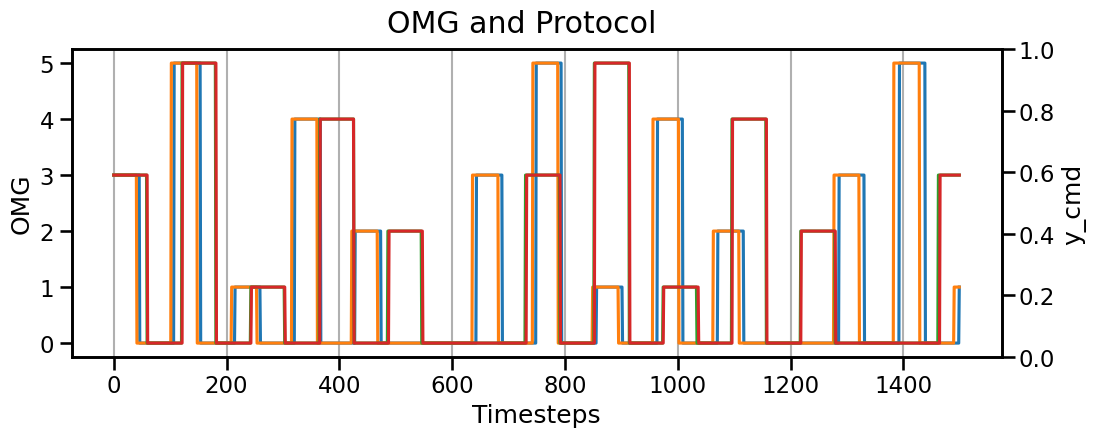

In [22]:
fig, ax1 = plt.subplots(sharex=True, figsize=(12, 4))
plt.suptitle('OMG and Protocol')
ax1.plot(table_1['gest'][:1500])
ax1.plot(table_2['gest'][:1500])
ax1.plot(table_3['gest'][:1500])
ax1.plot(table_4['gest'][:1500])
ax1.set_xlabel('Timesteps')
ax1.set_ylabel('OMG')
plt.grid(axis='x')
ax2 = ax1.twinx()
# target_df = pd.DataFrame(y_cmd)
# ax2.plot(table_2['gest'][:1500], 'b-')
ax2.set_ylabel('y_cmd')
# plt.yticks(np.arange(len(GESTURES)), GESTURES)
plt.show()

In [23]:
j = pd.DataFrame(list_table, columns = ['tab'])

In [24]:
j

,tab
0,y_cmd_46-37_2
1,y_cmd_14-41_2
2,y_cmd_07-13_2
3,y_cmd_20-47_2
4,y_cmd_14-05_2
5,y_cmd_03-50_2
6,y_cmd_08-46_2
7,y_cmd_11-45_2
8,y_cmd_16-21_2
9,y_cmd_06-44_2


In [25]:
# # [X features] '0', ..., '49' - каналы OMG датчиков
# #              'ACC0', 'ACC1', 'ACC2' - акселерометр (потенциально могут использоваться как факторы для модели)
# #              'GYR0', 'GYR1', 'GYR2' - гироскоп     (потенциально могут использоваться как факторы для модели)
# # 'BUTTON' - не используется
# # 'SYNC' - синхронизация данных с протоколом
# # 'ts' - метка времени
# gestures.columns

In [26]:
# gestures.shape[-1]

In [27]:
# gestures.shape